# 🧬 Gene Expression Data Analyzer

This notebook analyzes a **CSV file of gene expression data**, filters for top expressed genes, and generates:

- 📊 Bar plots of top genes
- 🌡️ Heatmaps if multiple samples
- 📈 Summary statistics tables

---

✅ Tools: Pandas, Matplotlib, Seaborn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

## 📂 Upload gene expression CSV file
Should have:
- First column as **Gene names**
- Other columns as expression values (FPKM, TPM, counts)


In [2]:
uploaded = files.upload()
filename = list(uploaded.keys())[0]

df = pd.read_csv(filename)
df.head()

Saving sample.csv to sample.csv


,Gene,Sample1,Sample2,Sample3
0,GeneA,50,55,53
1,GeneB,200,195,210
2,GeneC,30,35,28
3,GeneD,400,390,420
4,GeneE,120,110,115


## 🔍 Dataset overview


In [3]:
print(f"✅ Dataset contains {df.shape[0]} genes, {df.shape[1]} columns")
df.describe()

✅ Dataset contains 20 genes, 4 columns


,Sample1,Sample2,Sample3
count,20.000000,20.000000,20.000000
mean,119.750000,118.400000,123.900000
std,107.928765,105.882457,111.810413
min,5.000000,8.000000,7.000000
25%,41.250000,46.250000,43.000000
50%,87.500000,87.500000,91.000000
75%,185.000000,180.000000,191.250000
max,400.000000,390.000000,420.000000


## 📊 Bar plot of top expressed genes


/tmp/ipython-input-4-3627893796.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_sorted['Gene'], y=df_sorted[df.columns[1]], palette='viridis')


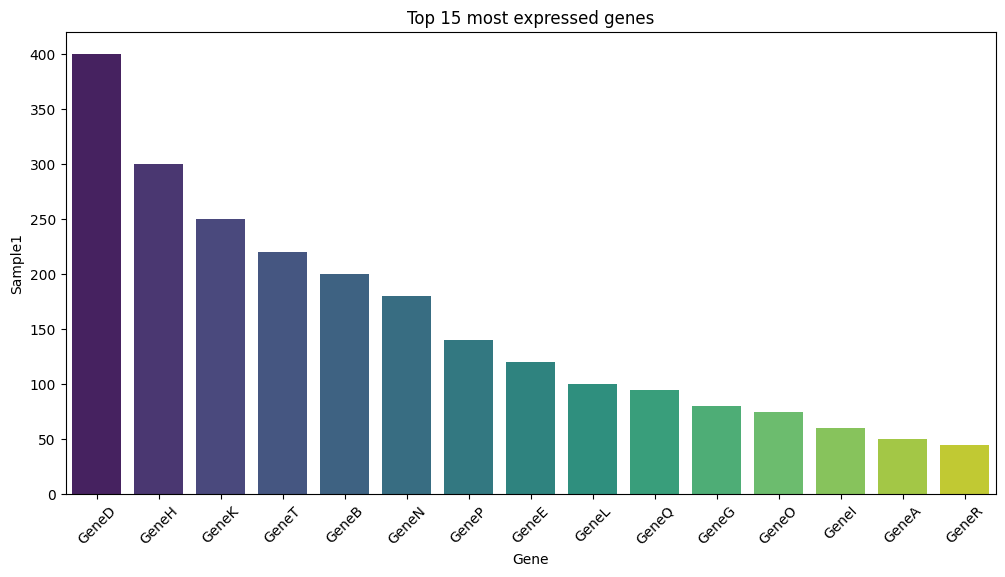

In [4]:
# Assuming first column is Gene, second is expression
df.columns = ['Gene'] + list(df.columns[1:])

top_n = 15
df_sorted = df.sort_values(df.columns[1], ascending=False).head(top_n)

plt.figure(figsize=(12,6))
sns.barplot(x=df_sorted['Gene'], y=df_sorted[df.columns[1]], palette='viridis')
plt.title(f"Top {top_n} most expressed genes")
plt.xticks(rotation=45)
plt.ylabel(df.columns[1])
plt.show()

## 🌡️ Heatmap across samples (if multiple columns)


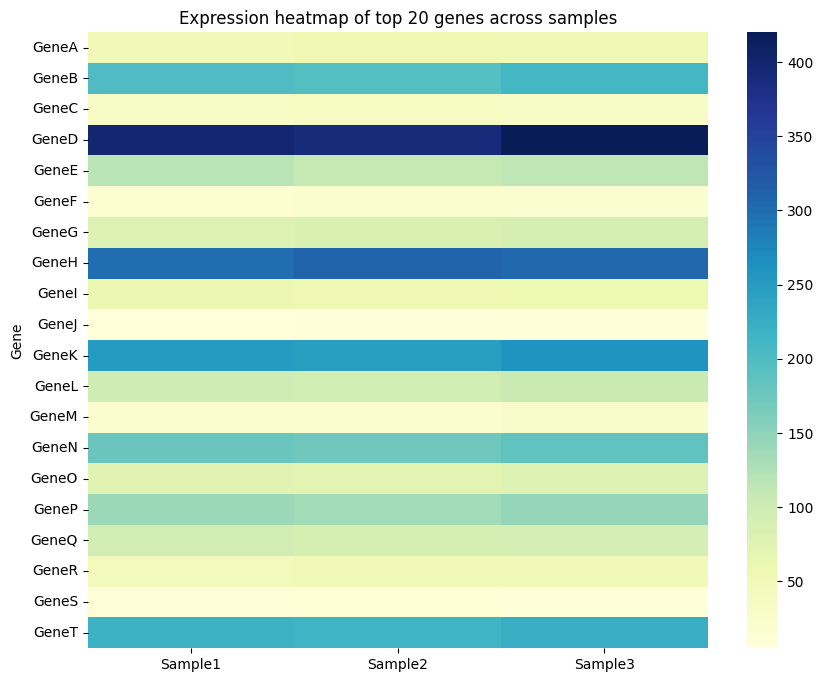

In [5]:
if df.shape[1] > 2:
    df_heat = df.set_index('Gene').head(20)
    plt.figure(figsize=(10,8))
    sns.heatmap(df_heat, cmap='YlGnBu', annot=False)
    plt.title("Expression heatmap of top 20 genes across samples")
    plt.show()
else:
    print("⚠️ Only one expression column found, skipping heatmap.")

## 📋 Summary statistics of expression data


In [6]:
df.set_index('Gene').describe()

,Sample1,Sample2,Sample3
count,20.000000,20.000000,20.000000
mean,119.750000,118.400000,123.900000
std,107.928765,105.882457,111.810413
min,5.000000,8.000000,7.000000
25%,41.250000,46.250000,43.000000
50%,87.500000,87.500000,91.000000
75%,185.000000,180.000000,191.250000
max,400.000000,390.000000,420.000000


## ✅ Conclusion

This notebook:
- Uploaded a CSV gene expression file
- Found and visualized the **top expressed genes**
- Created a **heatmap** across samples
- Summarized data with descriptive statistics

---